# ASSIGNMENT 3

 - Nama : Ica Nur Cahyani
 - Kode Peserta : PYTN-KS15-005

# Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

## Additional Information

Input variables:
   ### bank client data:
   1. age (numeric)
   2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
   3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
   4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
   5. default: has credit in default? (categorical: 'no','yes','unknown')
   6. housing: has housing loan? (categorical: 'no','yes','unknown')
   7. loan: has personal loan? (categorical: 'no','yes','unknown')
   ### related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: 'cellular','telephone') 
   9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ### other attributes:
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
   ### social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month rate - daily indicator (numeric)
  20. nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21. y : has the client subscribed a term deposit? (binary: 'yes','no')




# Import Pustaka 

In [1]:
# Import package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Load 

In [2]:
df = pd.read_csv("bank-additional-full.csv", delimiter= ";")

# Menampilkan Data

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Melihat Informasi Data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Menampilkan jumlah kolom dan baris 
df.shape

(41188, 21)

# Data Cleaning dan Visualization

In [6]:
# Mengecek missing value
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Mengecek data duplicate 
df.duplicated().sum()

12

In [8]:
# Mendrop data duplicated
df= df.drop_duplicates(keep="first")

In [9]:
# Mengecek ulang data duplicated
df.duplicated().sum()

0

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Membuat visualisasi kolom "age"

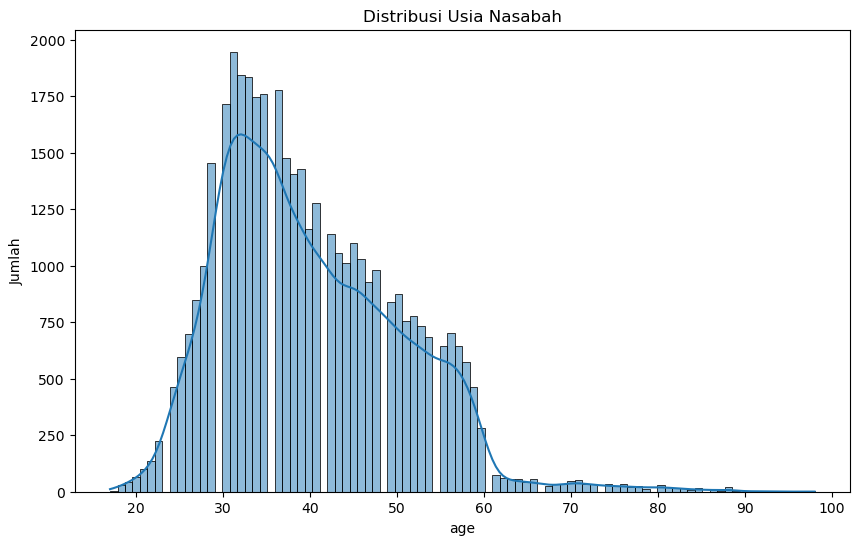

In [12]:
plt.figure(figsize = (10,6))
ax = sns.histplot(data=df, x="age", kde=True )
ax.set(xlabel = "age", ylabel="Jumlah")
plt.title("Distribusi Usia Nasabah")
plt.show()

### Membuat vIsualization kolom "job"

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


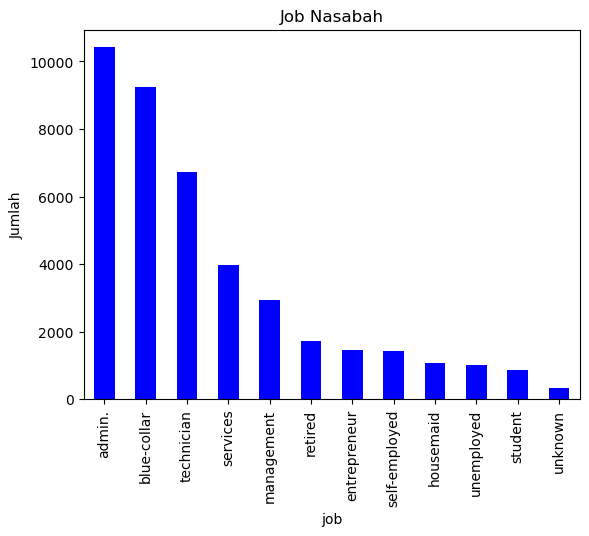

In [13]:
df_job= df["job"].value_counts()


#Membuat grafik batang 
df_job.plot(kind="bar", color="blue") 
plt.xlabel( 'job') #Judul sumbu X
plt.ylabel ('Jumlah') #Judul sumbu 
plt.title('Job Nasabah')
print(df_job)
plt.show()

Nasabah memiliki pekerjaan yang bervariasi berdasarkan diagram bar diatas pekerjaaan nasabah yang teridentifikasi ada admin, blue-collar, techician, services, management, retired, entrepreneur, self-employed, housemaid, unemployed dan student dan ada beberapa nasabah yang tidak diketahui jenis pekerjaannya. Nasabah bank ini paling banyak bekerja sebagai admin.

### Visualization Kolom target "y"

no     36537
yes     4639
Name: y, dtype: int64


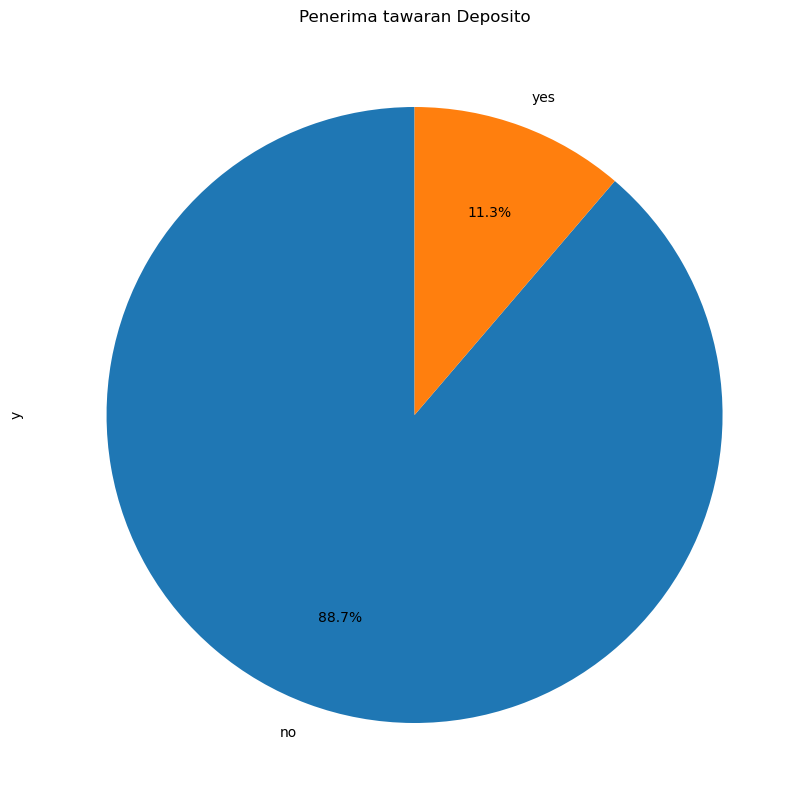

In [14]:
df_y = df["y"].value_counts()

#Membuat grafik

df_y.plot(
    kind="pie",
    figsize=(16,10),
    autopct='%1.1f%%',
    startangle=90,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True)

plt.title('Penerima tawaran Deposito')
print(df_y)
plt.show()

Berdasarkan grafik lingkarang diatas dapat dilhat bahwa nasabah yang menerima tawaran deposito lewat telepon lebih sedikit daripada nasabah yang menolak tawaran deposito, sehingga dapat disimpulkan teknik marketng penawaran deposito melalui telepon kurang menarik para nasabah.

# Data Preprocessing 

In [15]:
# Mendefinisikan label_encoder untuk mengubah data objek ke angka
Label_Encoder = preprocessing.LabelEncoder()

df_enc = df.select_dtypes(include='O')

for columns in df_enc.columns:
    df_enc[columns] = Label_Encoder.fit_transform(df[columns])
    

In [16]:
df_enc.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0


### Slicing Data 

In [17]:
x = df_enc.drop("y", axis=1)
y = df_enc["y"]

### Split Data

In [18]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Logistic Regression 

In [19]:
# Mendefinisikan model 
Logreg = LogisticRegression()

In [20]:
Logreg.fit(X_train, Y_train)

LogisticRegression()

In [21]:
predict_logreg = Logreg.predict(x_test)
predict_logreg

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
accuracy_score_logreg = accuracy_score(y_test, predict_logreg)
print("accuracy_score:", accuracy_score_logreg)

accuracy_score: 0.8853719744191695


In [23]:
print(classification_report(y_test, predict_logreg))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10929
           1       0.90      0.01      0.01      1424

    accuracy                           0.89     12353
   macro avg       0.89      0.50      0.48     12353
weighted avg       0.89      0.89      0.83     12353



### Confusion Matrix Logistic Regression

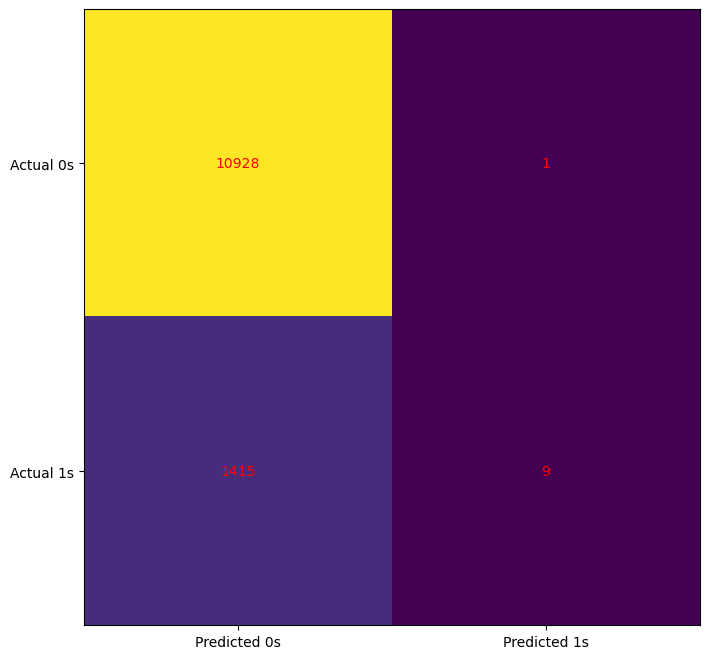

In [24]:
cm = confusion_matrix(y_test, predict_logreg)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


# K-Nearest Neighbors

In [25]:
# Pendifinisian model 
knn =KNeighborsClassifier(n_neighbors=9)

In [26]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [27]:
predict_knn = knn.predict(x_test)

In [28]:
accuracy_score_knn = accuracy_score(y_test, predict_knn )
print("accuracy score knn:", accuracy_score_knn )

accuracy score knn: 0.886262446369303


In [29]:
print(classification_report(y_test, predict_knn))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10929
           1       0.56      0.07      0.12      1424

    accuracy                           0.89     12353
   macro avg       0.72      0.53      0.53     12353
weighted avg       0.85      0.89      0.84     12353



### Mencari K yang optimal

In [30]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

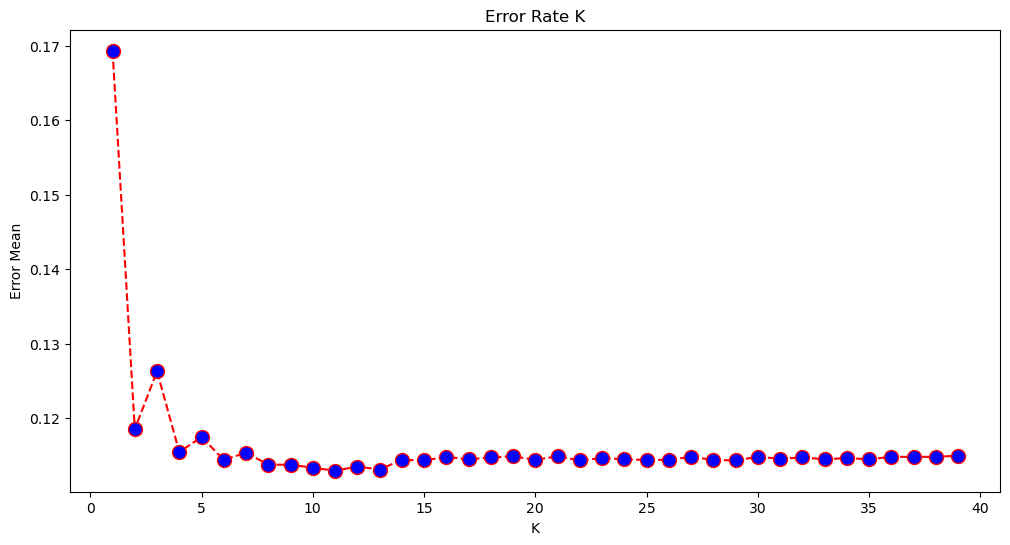

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Mean')
plt.show()

### Confusion Matrix KNN

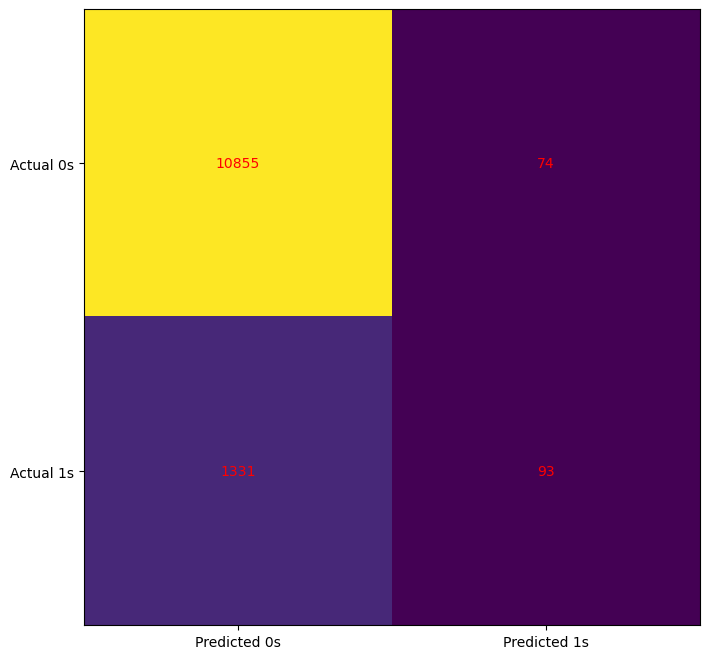

In [32]:
cm = confusion_matrix(y_test, predict_knn)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Support Vector Machine 

In [33]:
svm = LinearSVC()

In [34]:
svm.fit(X_train, Y_train)

c:\Users\HP\anaconda3\envs\KMI\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [35]:
predict_svm = svm.predict(x_test)

In [36]:
accuracy_scoresvm = accuracy_score(y_test, predict_svm)
print("accuracy score svm:", accuracy_scoresvm)

accuracy score svm: 0.884724358455436


In [37]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10929
           1       0.00      0.00      0.00      1424

    accuracy                           0.88     12353
   macro avg       0.44      0.50      0.47     12353
weighted avg       0.78      0.88      0.83     12353



c:\Users\HP\anaconda3\envs\KMI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\KMI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\anaconda3\envs\KMI\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix SVM

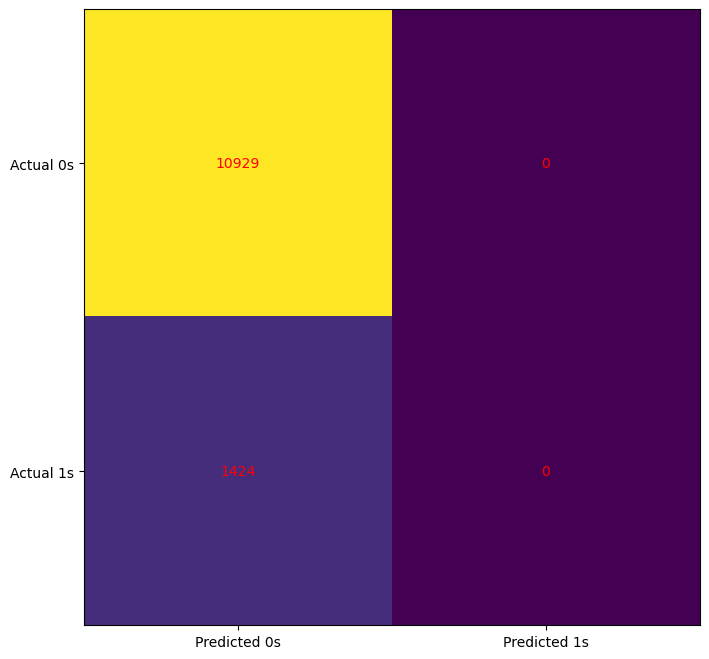

In [38]:
cm = confusion_matrix(y_test, predict_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Decision Tree

In [39]:
dec_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)

In [40]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [41]:
predict_dec_tree = dec_tree.predict(x_test)

In [42]:
accuracy_score_dectree = accuracy_score(y_test, predict_dec_tree)
print("accuracy score decision tree:", accuracy_score_dectree)

accuracy score decision tree: 0.8951671658706387


In [43]:
print(classification_report(y_test, predict_dec_tree))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10929
           1       0.65      0.19      0.30      1424

    accuracy                           0.90     12353
   macro avg       0.78      0.59      0.62     12353
weighted avg       0.87      0.90      0.87     12353



### Confusion Matrix Decision Tree

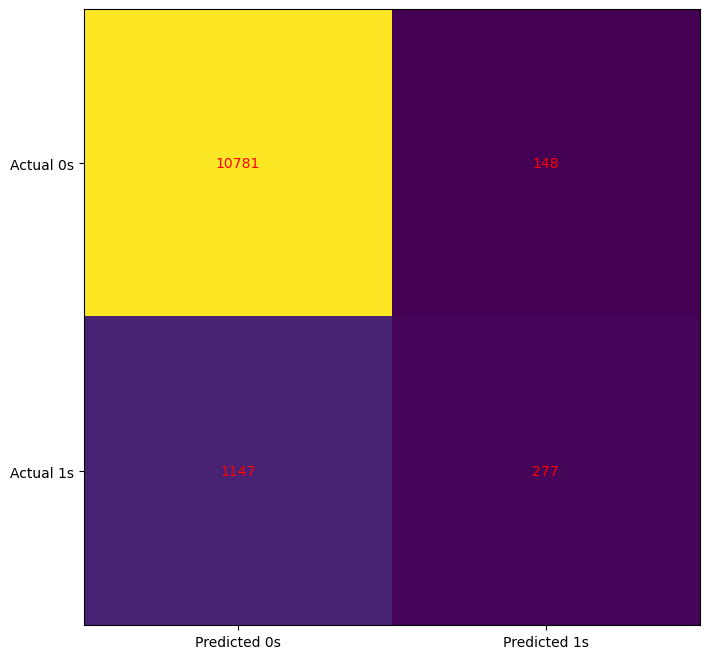

In [44]:
cm = confusion_matrix(y_test, predict_dec_tree)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Random Forest

In [45]:
Rfc = RandomForestClassifier()

In [46]:
Rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [47]:
predict_Rfc = Rfc.predict(x_test)

In [48]:
accuracy_score_Rfc = accuracy_score(y_test, predict_Rfc)
print("accuracy score random forest:", accuracy_score_Rfc)

accuracy score random forest: 0.8769529668906338


In [49]:
print(classification_report(y_test, predict_Rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     10929
           1       0.43      0.22      0.29      1424

    accuracy                           0.88     12353
   macro avg       0.67      0.59      0.61     12353
weighted avg       0.85      0.88      0.86     12353



### Confusion Matrix Random Forest

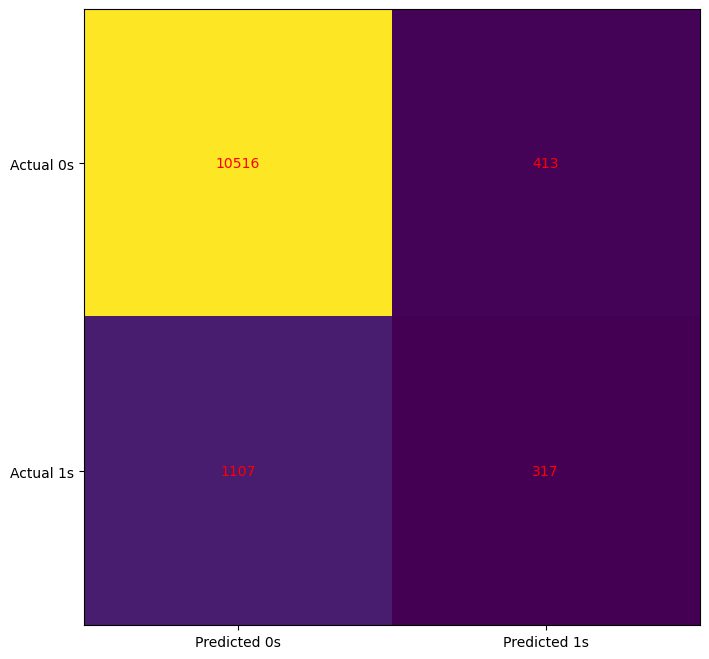

In [50]:
cm = confusion_matrix(y_test, predict_Rfc)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Naive Bayes 

In [51]:
nb =  GaussianNB()

In [52]:
nb.fit(X_train, Y_train)

GaussianNB()

In [53]:
predict_nb = nb.predict(x_test)

In [54]:
accuracy_score_nb = accuracy_score(y_test, predict_nb)
print("accuracy score naive bayes:", accuracy_score_nb)

accuracy score naive bayes: 0.8424674168218247


In [55]:
print(classification_report(y_test, predict_nb))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10929
           1       0.31      0.31      0.31      1424

    accuracy                           0.84     12353
   macro avg       0.61      0.61      0.61     12353
weighted avg       0.84      0.84      0.84     12353



### Confusion Matrix Naive Bayes 

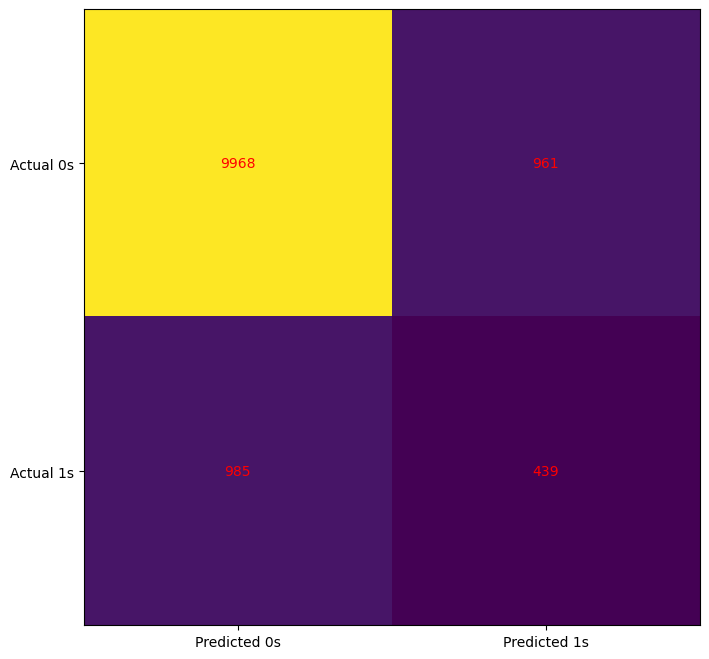

In [56]:
cm = confusion_matrix(y_test, predict_nb)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Accuracy Score dari Semua Model  

In [57]:
print("accuracy score Logistic Regression:", accuracy_score_logreg)
print("accuracy score knn:", accuracy_score_knn)
print("accuracy score svm:", accuracy_scoresvm)
print("accuracy score decision tree:", accuracy_score_dectree)
print("accuracy score random forest:", accuracy_score_Rfc)
print("accuracy score naive bayes:", accuracy_score_nb)

accuracy score Logistic Regression: 0.8853719744191695
accuracy score knn: 0.886262446369303
accuracy score svm: 0.884724358455436
accuracy score decision tree: 0.8951671658706387
accuracy score random forest: 0.8769529668906338
accuracy score naive bayes: 0.8424674168218247
